# Task 1 -  Prediction using Supervised ML
>  Predict the percentage of marks of an student based on the number of study hours

## <b>Author:</b> Rama Mishra

<div class="alert alert-block alert-info">

### The steps are broadly:<br>
1. Reading and understanding the data<br>
         shape(), info, describe, duplicate values check<br>

2. Visualising the Data<br>
         pairplot, Univariate Analysis , bivariate Analysis, correlation , heatmap <br>

3. Performing Simple Linear Regression<br>
         a) Train-Test-Split <br>
         b) Buliding a Linear Model<br>
            - training using statsmodel<br> 
            - training using SkLearn Package<br>
4. Residual analysis<br>
        a)  Validating Linear Regression assumptions<br>
         1. Distribution of the error terms<br>
         2. Error terms should be randomly distributed<br>
    
5. Predictions on the Test Set<br>
        a) using statsmodel <br>
        b) using SkLearn Package<br> 

6. Evaluate the Model <br>

 
 
</div>

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
link = 'http://bit.ly/w-data'
marks_data = pd.read_csv(link)
marks_data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Inspecting dataset

In [6]:
# Checking shape
marks_data.shape

(25, 2)

In [7]:
# Checking info
marks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
marks_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<div class="alert alert-block alert-info">
    Conclusion: There are no rows having nulls and data types for both the columns are appropriate
</div>

In [9]:
marks_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<div class="alert alert-block alert-info">
Conclusion: Data dosen't seem to have outliers. Data is spread across evenly.
    </div>

## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `marks_data`.

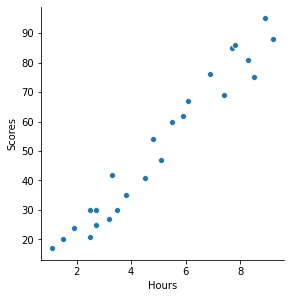

In [10]:
sns.pairplot(marks_data, x_vars=['Hours'], y_vars='Scores',size=4, aspect=1, kind='scatter')
plt.show()

## Univariate Analysis

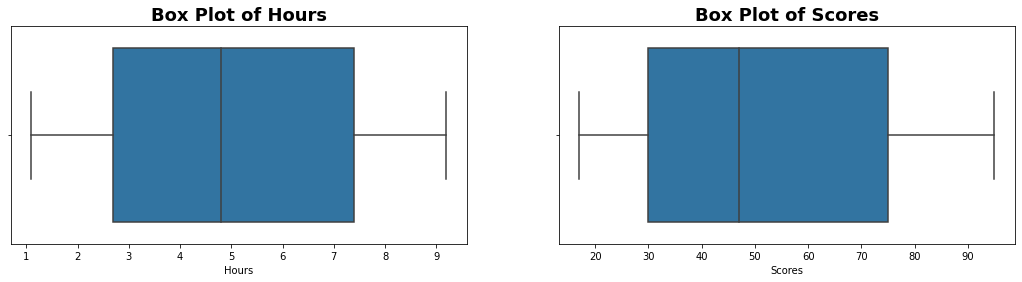

In [6]:
# Univariate analysis
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x = 'Hours', data = marks_data)
plt.title('Box Plot of Hours', fontweight = 'bold', fontsize = 18)
plt.subplot(1,2,2)
sns.boxplot(x = 'Scores', data = marks_data)
plt.title('Box Plot of Scores',fontweight = 'bold', fontsize = 18)

plt.show()

<div class="alert alert-block alert-info">
Conclusion: There are no outliers present in the two columns
    </div>

## Bivariate Analysis

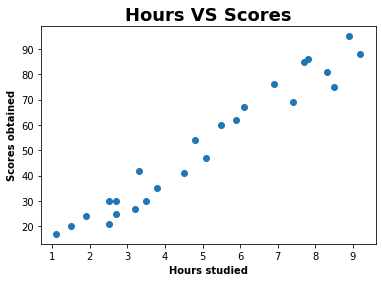

In [7]:
# Bivariate Analysis

plt.scatter(x = 'Hours', y = 'Scores' , data = marks_data)
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Hours VS Scores', fontweight = 'bold', fontsize = 18)
plt.show()

<div class="alert alert-block alert-info">
Conclusion: Hours and score do have a linear relationship between them. So performing linear Regression on this dataset. <br>
    Perfrom correlation also.
    </div>

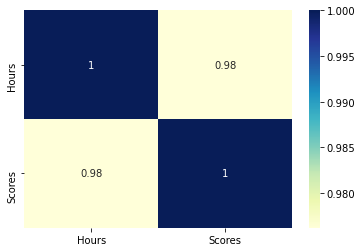

In [11]:
sns.heatmap(marks_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

<div class="alert alert-block alert-info">
Conclusion: Hours and Score is highly positively correlated with a correlation factor of 0.98
    </div>

## Step 3: Performing Simple Linear Regression
Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

## Test Train Split
You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [12]:
# Creating X and Y sets 
X = marks_data['Hours']
y = marks_data['Scores']

In [13]:
# Performing test train split with 70-30 ratio
X_train, X_test,  y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [14]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (17,)
X_test:  (8,)
y_train:  (17,)
y_test:  (8,)


## Building a Linear Model

### Training using Stats model
By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [15]:
# Adding constant
X_train_sm = sm.add_constant(X_train)
# Buidling and fitting the model
lr_model = sm.OLS(y_train, X_train_sm).fit()
# Checking the models parameters
lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

In [16]:
# Printing the model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        22:04:34   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

<div class="alert alert-block alert-info">
Conclusion: The p - value for Hours is significant as the p value is less than 0.05 and the r-square is also 95.7%.
    </div>

<div class="alert alert-block alert-success">
The fit is significant. Let's visualize how well the model fit the data.<br>

From the parameters that we get, our linear regression equation becomes:<br>
### $ Scores = 1.4951+9.8717 \times Hours $
</div>

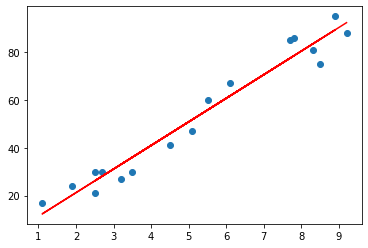

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951+9.8717*X_train, 'r')
plt.show()

### Training using SK Learn package

In [19]:
# Reshaping X train set
X_train = X_train.values.reshape(-1,1)

In [20]:
# Building the model using SK Learn package
lr_model_sk = LinearRegression().fit(X_train,y_train)

In [21]:
# Displaying model parameters
print('Intercept of line: ',lr_model_sk.intercept_)
print('Coefficent of Hours: ',lr_model_sk.coef_)

Intercept of line:  1.495142109236383
Coefficent of Hours:  [9.87171443]


In [22]:
# Checking r - square of sklearn model
y_train_pred = lr_model_sk.predict(X_train)
r2score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2_score using sklearn model: ', (r2score_train)*100)

R2_score using sklearn model:  95.70735354094693


Factors        |Stats Model   |SkLearn Package
-------------  | -------------|---------------
R2 Score       | 95.707353    | 95.707353
line Intercept | 1.49514210   | 1.49514210
Coefficent     | 9.87171443   | 9.87171443

<div class="alert alert-block alert-info">

#### Conclusion:There is no difference between the results generated from stats model and sk learn package model. 
 </div>

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

## Validating Linear Regression assumptions
> 1. Distribution of the error terms<br>
> 2. Error terms should be randomly distributed

### 1.Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [23]:
#Error terms are normally distributed
res = y_train - y_train_pred

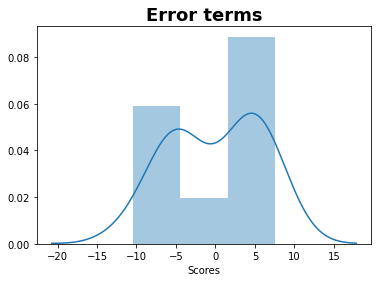

In [24]:
sns.distplot(res)
plt.title('Error terms',fontweight = 'bold', fontsize = 18)
plt.show()

<div class="alert alert-block alert-info">

#### Conclusion: It can be seen that the error terms are normally distributed
  </div>

### 2. Error terms should be randomly distributed

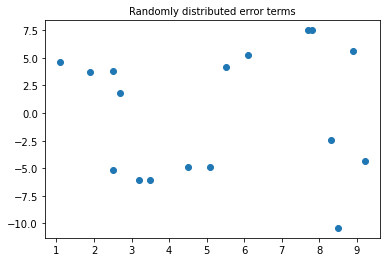

In [37]:
# Error terms should be randomly distributed

plt.scatter(X_train, res)
plt.title('Randomly distributed error terms', fontsize = 10)
plt.show()

`Conclusion:`Error terms/ residuals dont tend to follow any particular pattern as such. They seem to be distributed randomly. With this, validated another assumption for Linear Regression

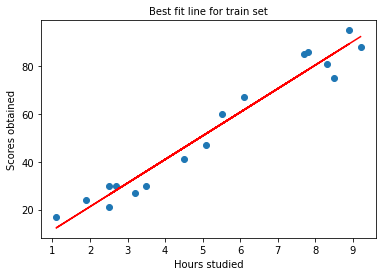

In [38]:
#Visualizing the fit on the train set
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.title('Best fit line for train set', fontsize = 10)
plt.show()

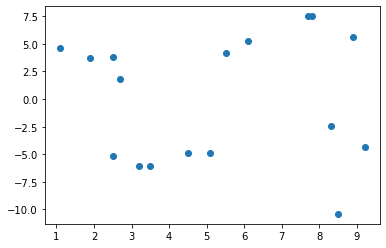

In [39]:
plt.scatter(X_train,res)
plt.show()

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

### Predictions using stats model

In [27]:
# Adding constant to X test set
X_test_sm = sm.add_constant(X_test)
# Making predictions on the trained stats model
y_test_pred = lr_model.predict(X_test_sm)

In [28]:
# Checking the r- squared on the test set using stats model
r2score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('R2_score of test set using stats model: ', (r2score)*100)

R2_score of test set using stats model:  93.09458862687438


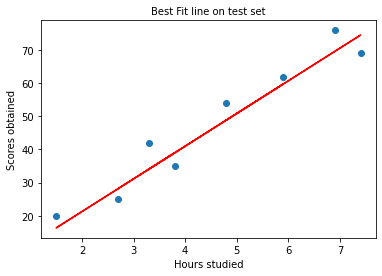

In [41]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.title('Best Fit line on test set', fontsize = 10)
plt.show()

### Using SK learn model


In [30]:
# Reshaping the X test set
X_test = X_test.values.reshape(-1,1)

In [31]:
# Making predictions using sklearn model
y_test_pred_sk = lr_model_sk.predict(X_test)


In [32]:
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred_sk})
predicted_df

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


## Step6: Evaluating the model

In [34]:
# Checking the r- squared on the test set using sklearn model
r2score = r2_score(y_true=y_test, y_pred=y_test_pred_sk)
print('R2_score of test set using SK Learn model: ', (r2score)*100)

R2_score of test set using SK Learn model:  93.09458862687437


<div class="alert alert-block alert-success">

**Conclusion:` The R-square on the train set was 95.7%, whereas on the test set it is 93.09% which is acceptable. Hence, this model is performing well i.e. it has generalised the data well.**
</div>